In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
block_sizes = [2**i for i in range(6)]
labels = ['1', '2_1', '2_2']

In [3]:
def parse_output(path):
    def parse_time(s):
        return float(s.split(':')[1][:-len('(ms)')-1])
    with open(path, 'r') as f:
        r = f.read().strip().split('\n')
    return tuple(map(parse_time, r[-3:]))

In [4]:
result = dict()
for label in labels:
    result[label] = []
    for block_size in block_sizes:
        result[label].append(parse_output(f'../results/Output_{block_size}_{label}'))

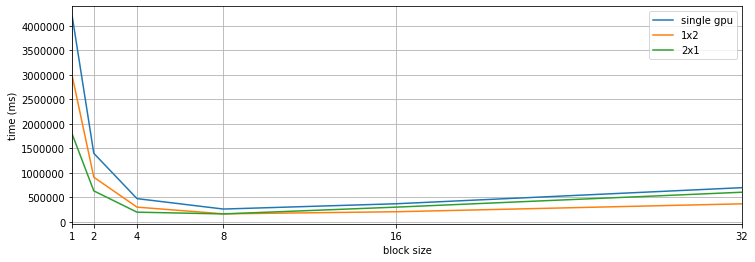

In [5]:
times = list(zip(*[map(sum, result[key]) for key in result]))
plt.figure(figsize=(12,4))
plt.xlim(min(block_sizes), max(block_sizes))
plt.xticks(block_sizes)
plt.grid(True)
plots = plt.plot(block_sizes, times)
plt.legend(plots, ('single gpu', '1x2', '2x1'), loc='best')
plt.xlabel('block size')
plt.ylabel('time (ms)')
plt.savefig("images/total_time.pdf") 

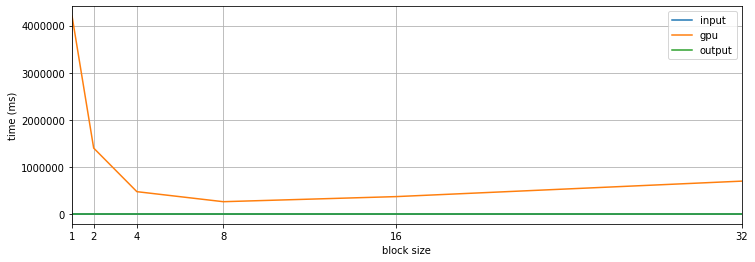

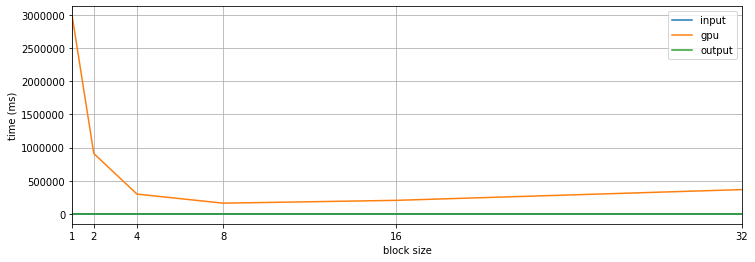

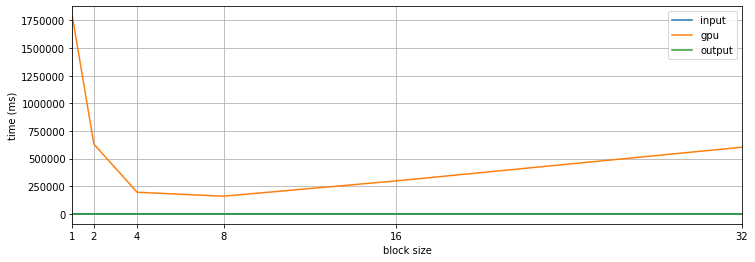

In [6]:
for key in result:
    times = result[key]
    plt.figure(figsize=(12,4))
    plt.xlim(min(block_sizes), max(block_sizes))
    plt.xticks(block_sizes)
    plt.grid(True)
    plots = plt.plot(block_sizes, times)
    plt.legend(plots, ('input', 'gpu', 'output'), loc='best')
    plt.xlabel('block size')
    plt.ylabel('time (ms)')
    plt.savefig(f"images/time_{key}.pdf") 